In [1]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# ✅ I. ЖЕҢІЛ ЕСЕПТЕР (Beginner)

## 🟢 Task 1. Жай сызықтық регрессияны қолмен есептеу

Берілгендер:

```python
X = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 6]
```



Тапсырма:
1.  Орта мәндерді есепте
2.  Формула арқылы w мен b тап
3.  y_pred есепте
4.  График сал


In [2]:
# Берілгені
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 6])

In [3]:
# Орта мәндер
x_mean = X.mean()
y_mean = Y.mean()

In [4]:
# Формула арқылы w мен b тап

# w = sum((X - x') * (Y - y')) / sum((X - x') ** 2)
w = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)

# b = y - x*w
b = y_mean - w * x_mean

print(f"w = {w}\nb = {b}")

w = 0.8
b = 1.7999999999999998


In [5]:
# y_pred есепте
y_pred = w * X + b

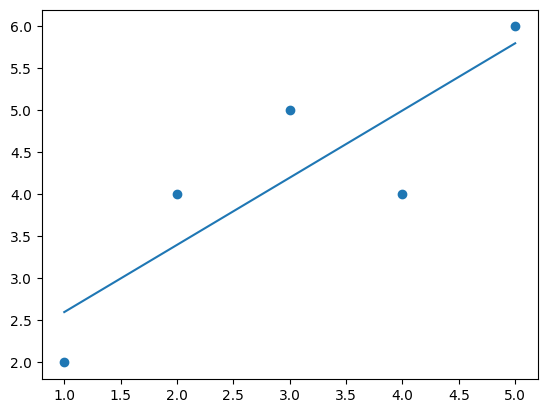

In [6]:
plt.scatter(X, Y)
plt.plot(X, y_pred)
plt.show()

## 🟢 Task 2. Scikit-learn арқылы Linear Regression
Берілгендер:

```python
X = [[10], [20], [30], [40], [50]]
y = [15, 25, 35, 45, 60]
```

Тапсырма:
1.  LinearRegression() қолдан
2.  coef_, intercept_ тап
3.  60 үшін болжам жаса


In [7]:
# Берілгендер
X = np.array([[10], [20], [30], [40], [50]])
Y = np.array([15, 25, 35, 45, 60])


In [8]:
# LinearRegression()
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [9]:
# coef_, intercept_ тап
print(f"coef_ = {model.coef_}\nintercept_ = {model.intercept_}")

coef_ = [1.1]
intercept_ = 3.0


In [10]:
# 60 үшін болжам жаса
y_60 = model.predict([[60]])
y_60

array([69.])

## 🟢 Task 3. Қате есептеу (MSE)
Алдыңғы есептің нәтижесі бойынша:
1.  mean_squared_error есепте
2.  Қолмен есептеп салыстыр


In [11]:
# mean_squared_error есепте
y_pred = model.predict(X.reshape((-1, 1)))

mse = mean_squared_error(Y, y_pred)
mse

1.9999999999999942

In [12]:
# Қолмен есептеп салыстыр
mse_self = np.sum((Y - y_pred) ** 2) / len(Y)
mse_self == mse

np.True_

# ✅ II. ОРТА ДЕҢГЕЙ (Intermediate)

## 🟡 Task 4. Train / Test бөлу
Кез келген dataset қолдан:
1.  train_test_split
2.  Linear Regression үйрет
3.  Train MSE және Test MSE салыстыр


In [13]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
     11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Y ≈ 3 * X + аздаған шум (сызықтық байланыс үшін)
Y = np.array([4, 7, 11, 13, 15, 20, 22, 25, 29, 31,
     35, 38, 41, 44, 47, 51, 53, 57, 60, 62])

In [14]:
# train_test_split
x_train, x_test = train_test_split(X, test_size=0.25)
y_train, y_test = train_test_split(Y, test_size=0.25)

In [15]:
# Linear Regression үйрет
mod_inter = LinearRegression()
mod_inter.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [16]:
mse_train = mean_squared_error(y_train, mod_inter.predict(x_train.reshape(-1, 1)))
mse_test = mean_squared_error(y_test, mod_inter.predict(x_test.reshape(-1, 1)))
print(f"mse_train: {mse_train}\nmse_test: {mse_test}")

mse_train: 199.35536253776436
mse_test: 562.963290256113


## 🟡 Task 5. Ridge регрессияны қосу
Сол dataset үшін:
1.  LinearRegression
2.  Ridge(alpha=0.1)
3.  Ridge(alpha=10)


үш модель құрып:
 -  MSE салыстыр
 -  Қайсысы overfitting берді?


In [17]:
# model 1
model_1 = LinearRegression()
model_1.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [18]:
# model 2
model_2 = Ridge(alpha=0.1)
model_2.fit(x_train.reshape(-1, 1), y_train)

Ridge(alpha=0.1)

In [19]:
# model 3
model_3 = Ridge(alpha=10)
model_3.fit(x_train.reshape(-1, 1), y_train)

Ridge(alpha=10)

In [20]:
mse_model_1 = mean_squared_error(y_train, model_1.predict(x_train.reshape(-1, 1)))
mse_model_2 = mean_squared_error(y_train, model_2.predict(x_train.reshape(-1, 1)))
mse_model_3 = mean_squared_error(y_train, model_3.predict(x_train.reshape(-1, 1)))

In [21]:
print(f"mse_model_1: {mse_model_1}")
print(f"mse_model_2: {mse_model_2}")
print(f"mse_model_3: {mse_model_3}")

mse_model_1: 199.35536253776436
mse_model_2: 199.35536316329623
mse_model_3: 199.36139043041882


## 🟡 Task 6. Alpha әсерін зерттеу


```python
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
```

Тапсырма:
- Әр alpha үшін Ridge үйрет
- Салмақтардың (coef) өзгеруін графикке түсір
- Қорытынды жаса


In [22]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

In [23]:
# Әр alpha үшін Ridge үйрет
models = []
for alpha in alphas:
  mod = Ridge(alpha=alpha)
  mod.fit(x_train.reshape(-1, 1), y_train)
  models.append(mod)

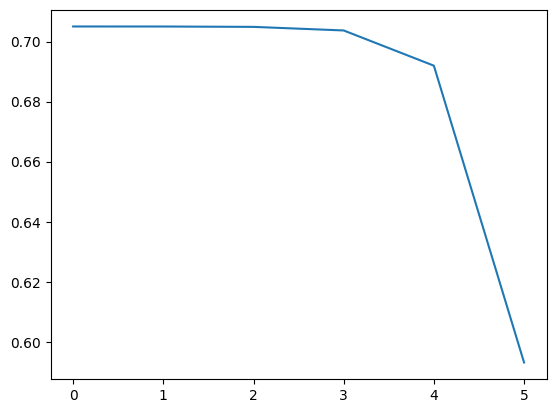

In [24]:
# Салмақтардың (coef) өзгеруін графикке түсір
coefs = [mod.coef_ for mod in models]
plt.plot(coefs)
plt.show()

alpha өскен сайын коэфициент азайып жатыр

# ✅ III. КҮРДЕЛІ ЕСЕПТЕР (Advanced)

## 🔴 Task 7. Үлкен feature саны
Dataset құрастыр:
 - 1 target
 - 10 feature
 - Feature арасында корреляция болсын

Тапсырма:
 - Linear Regression үйрет
 - Ridge үйрет
 - Қайсысы тұрақты?


In [25]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "NY-House-Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nelgiriyewithana/new-york-housing-market",
  file_path
)


/tmp/ipython-input-1285965756.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 271k/271k [00:00<00:00, 57.8MB/s]

Extracting zip of NY-House-Dataset.csv...


In [26]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [27]:
ds = df[
    [
        'PRICE',
        'BEDS',
        'BATH',
        'PROPERTYSQFT',
        'ADMINISTRATIVE_AREA_LEVEL_2',
        'LATITUDE',
        'LONGITUDE'
        ]
    ]
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PRICE                        4801 non-null   int64  
 1   BEDS                         4801 non-null   int64  
 2   BATH                         4801 non-null   float64
 3   PROPERTYSQFT                 4801 non-null   float64
 4   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 5   LATITUDE                     4801 non-null   float64
 6   LONGITUDE                    4801 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 262.7+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

le = LabelEncoder()
ds['ADMINISTRATIVE_AREA_LEVEL_2'] = le.fit_transform(ds['ADMINISTRATIVE_AREA_LEVEL_2'])

ds.head()

/tmp/ipython-input-2135547581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['ADMINISTRATIVE_AREA_LEVEL_2'] = le.fit_transform(ds['ADMINISTRATIVE_AREA_LEVEL_2'])


,PRICE,BEDS,BATH,PROPERTYSQFT,ADMINISTRATIVE_AREA_LEVEL_2,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.0,26,40.761255,-73.974483
1,195000000,7,10.000000,17545.0,28,40.766393,-73.980991
2,260000,4,2.000000,2015.0,28,40.541805,-74.196109
3,69000,3,1.000000,445.0,28,40.761398,-73.974613
4,55000000,7,2.373861,14175.0,28,40.767224,-73.969856


In [29]:
X = ds.drop('PRICE', axis=1)
Y = ds['PRICE']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [31]:
mod_house = LinearRegression()
mod_house.fit(X_train, Y_train)

LinearRegression()

In [32]:
mod_rid = Ridge(alpha=100)
mod_rid.fit(X_train, Y_train)
X_train.shape

(3840, 6)

In [33]:
X_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
X_poly.shape

(3840, 28)

In [34]:
mod_pol = LinearRegression()
mod_pol.fit(X_poly, Y_train)

LinearRegression()

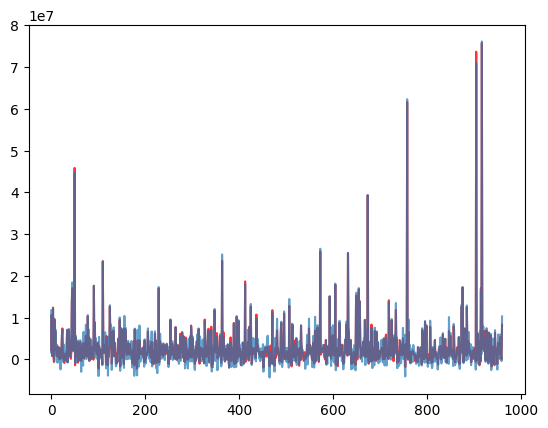

In [35]:
plt.plot(mod_rid.predict(X_test), color='red', alpha=0.8)
plt.plot(mod_house.predict(X_test), alpha=0.7)
plt.show()

In [36]:
pred_data = X_test.iloc[-1]
pred_price = Y_test.iloc[-1]
price = mod_house.predict([pred_data])
print(f"price: {price}\npred_price: {pred_price}")
#

price: [10307109.72606349]
pred_price: 1599000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
mod_pol.predict(PolynomialFeatures(degree=2).fit_transform(X_test))[0]

np.float64(1764976.610900879)

In [40]:
print(f"price: {pred_price}")
mod_rid.predict([pred_data])

price: 1599000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([8323755.81799906])

Ridge, Gradient Descent қарап үлгермедім